## CORDIC Testbench


This notebook is to test the implementation of a CORDIC running on the programmable logic. The CORDIC is used to convert cartesian to polar coordinates. The output is compared with a Python calculation of the coordinate transform. It takes in x and y and gives out r and theta where r is the radius and theta is the angle.

In [1]:
from pynq import Overlay
from pynq import MMIO
import numpy as np
import struct
import binascii
import cmath
import random
import matplotlib.pyplot as plt

NUM_SAMPLES = 50

In [2]:
ol=Overlay('./Cordic1.bit') #Change name of bitstream as required

In [3]:
cordic_ip=MMIO(0x40000000,10000) #Change base address as required

In [4]:
# cordic_ip = ol.cordiccart2pol_0
r_error=np.zeros(NUM_SAMPLES)
theta_error=np.zeros(NUM_SAMPLES)
ind=np.arange(NUM_SAMPLES)
r_rmse=np.zeros(NUM_SAMPLES)
theta_rmse=np.zeros(NUM_SAMPLES)

In [5]:
for i in range(NUM_SAMPLES):
    #Generating random inputs
    x=random.uniform(-1,1)
    y=random.uniform(-1,1)
    
    #Computing golden output
    cn=complex(x,y)
    cn=cmath.polar(cn)
    
    #Converting input to bytes to be sent to FPGA
    x=(struct.unpack('<I', struct.pack('<f', x))[0])
    y=(struct.unpack('<I', struct.pack('<f', y))[0])
    
    #Writing values to the FPGA
    cordic_ip.write(0x10,x)                             #Change the offset as mentioned in vivado file
    cordic_ip.write(0x18,y)                             #Change the offset as mentioned in vivado file
    
    #Starting and stopping the IP (Don't change this)
    cordic_ip_ctrl=MMIO(0x40010000,10000)
    cordic_ip_ctrl.write(0x00,1)
    cordic_ip_ctrl.write(0x00,0)
    
    #Reading from IP
    r=hex(cordic_ip.read(0x20))                         #Change the offset as mentioned in vivado file
    r=r[2:]
    theta=hex(cordic_ip.read(0x30))                     #Change the offset as mentioned in vivado file
    theta=theta[2:]

    print(r)
    print(len(r))
    print(theta)
    print(len(theta))
    #Converting to float
    if r!=0:
        r=struct.unpack('>f', binascii.unhexlify(r))
        r=r[0]
    if theta!=0:
        theta=struct.unpack('>f', binascii.unhexlify(theta))
        theta=theta[0]
        
    #Comparing with golden output    
    r_error[i]="{0:.6f}".format(abs(r-cn[0]))
    theta_error[i]="{0:.6f}".format(abs(theta-cn[1]))

3f4ea697
8
3f0acb61
8
3f4268fa
8
bfec8c6f
8
3f578f3f
8
3e20cf1f
8
3f48132b
8
c026f1fb
8
3f446acf
8
3f9142db
8
3ef63de5
8
bfe55d17
8
3f3216d5
8
402cfe5b
8
3f09fbb5
8
c0070fc5
8
3f6fc06c
8
c01526ad
8
3ec2a507
8
bfce4eb3
8
3f25512b
8
3fc28d17
8
3f14ce6f
8
be6319e3
8
3ea52e1a
8
bffa5af2
8
3f3c94ed
8
bfc63b01
8
3f618305
8
c0316205
8
3e082a45
8
4023631d
8
3efc5933
8
bfae029d
8
3f71a0be
8
c005c7cf
8
3f7a665d
8
c00c91a1
8
3f862a07
8
3f833e2b
8
3ec2d3b0
8
3fdc41c1
8
3f51cd48
8
3fca1547
8
3f780632
8
3f511cb6
8
3ee5737a
8
3ff62186
8
3eee51ac
8
c0012725
8
3ee90f8a
8
4042f893
8
3e9356b2
8
4003d819
8
3f59d43c
8
40168aab
8
3f60b8e2
8
3edfcbff
8
3f711f21
8
402976af
8
3f572349
8
beb246ff
8
3f2ee420
8
bf387c51
8
3f7dc075
8
bfd57469
8
3f7c865f
8
3e80249d
8
3f6b716c
8
bd63988d
8
3f1d4210
8
3e3d8e89
8
3f16eec2
8
3fea9b01
8
3e760778
8
c039ae45
8
3fab58e0
8
401579ad
8
3e6a67f0
8
c03d46f1
8
3f3ec7c0
8
3fa62147
8
3efbe603
8
c00aacab
8
3eb563da
8
bfa24b5d
8
3eeff43c
8
3fa49549
8
3f49c202
8
4044a67b
8
3f8918f3
8

## Verifying Functionality

In [6]:
sum_sq_r=0
sum_sq_theta=0
for i in range(NUM_SAMPLES):
    sum_sq_r =sum_sq_r+(r_error[i]*r_error[i])
    r_rmse = np.sqrt(sum_sq_r / (i+1))
    sum_sq_theta =sum_sq_theta+(theta_error[i]*theta_error[i])
    theta_rmse = np.sqrt(sum_sq_theta / (i+1))
print("Radius RMSE: ", r_rmse, "Theta RMSE:", theta_rmse)    
if r_rmse<0.001 and theta_rmse<0.001:
    print("PASS")
else:
    print("FAIL")

Radius RMSE:  0.00031054761309660717 Theta RMSE: 1.8749933333214815e-05
PASS


## Displaying Errors

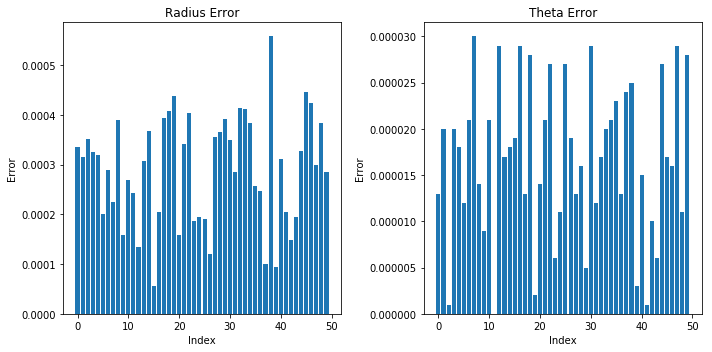

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(ind,r_error)
plt.title("Radius Error")
plt.xlabel("Index")
plt.ylabel("Error")
#plt.xticks(ind)
plt.tight_layout()

plt.subplot(1,2,2)
plt.bar(ind,theta_error)
plt.title("Theta Error")
plt.xlabel("Index")
plt.ylabel("Error")
#plt.xticks(ind)
plt.tight_layout()